In [1]:

import nlpaug.augmenter.sentence as nas
import nlpaug.augmenter.word as naw



2024-09-01 19:35:50.088763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 19:35:50.103668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 19:35:50.108210: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 19:35:50.119805: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-01 19:35:51.125495: W tensorflow/compiler/tf2

# Data Processing


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
train_data=pd.read_csv("Dataset/Dataset_train.tsv",delimiter='\t', names=['text','labels'])
test_data=pd.read_csv("Dataset/Dataset_test.tsv",delimiter='\t', names=['text','labels'])
val_data=pd.read_csv("Dataset/Dataset_dev.tsv",delimiter='\t', names=['text','labels'])

In [3]:
provided_data = pd.concat([train_data,test_data,val_data])


In [4]:
provided_data

,text,labels
0,text1,labels
1,creates a backdoor through which remote attack...,"['T1005', 'T1005']"
2,captures window titles.,"['T1010', 'T1010']"
3,hides any strings related to its own indicator...,"['T1027', 'T1027']"
4,creates a backdoor through which remote attack...,"['T1059', 'T1059']"
...,...,...
600,The threat actor can now combine the informati...,"['T1016', 'T1110']"
601,The Trojan then gets the hexadecimal values of...,"['T1573', 'T1070.004', 'T1074', 'T1041', 'T104..."
602,This IP has hosted other domains used by APT3 ...,"['T1016', 'T1068']"
603,We include a list of observed hardcoded ip C2 ...,"['T1016', 'T1008']"


In [5]:
provided_data['labels'] = provided_data['labels'].apply(lambda x: x.replace(" ", "").strip('[]').split(','))
def strip_quotes(label_list):
    return [label.strip("'") for label in label_list]
provided_data.labels=provided_data.labels.apply(strip_quotes)

In [6]:
provided_data=provided_data.drop(index=0)

In [7]:
def unique_labels(labels):
    unique = []
    for y in labels:
        for technique in y:
            if technique.strip() not in unique:
                unique.append(technique.strip())
    return unique

In [8]:
def plot_classes_sums(classes,color='blue'):
    plt.figure(figsize=(40,6))
    plt.subplot(1,2,2)
    bars=classes.plot(kind='bar',color=color)
    plt.xlabel("Technique ID")
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.xticks(rotation=90)
    for p in bars.patches:
        bars.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    plt.show()

In [9]:
UniqueLabels=unique_labels(provided_data.labels)
len(UniqueLabels)

193

In [10]:
ohe_matrix = np.zeros((len(provided_data),len(UniqueLabels)))
provided_data[UniqueLabels]=ohe_matrix

/tmp/ipykernel_53539/534826084.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  provided_data[UniqueLabels]=ohe_matrix
/tmp/ipykernel_53539/534826084.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  provided_data[UniqueLabels]=ohe_matrix
/tmp/ipykernel_53539/534826084.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `n

In [11]:
provided_data

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
1,creates a backdoor through which remote attack...,"[T1005, T1005]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,captures window titles.,"[T1010, T1010]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hides any strings related to its own indicator...,"[T1027, T1027]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,creates a backdoor through which remote attack...,"[T1059, T1059]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,stages collected data in a text file.,"[T1074, T1074]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,The threat actor can now combine the informati...,"[T1016, T1110]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,The Trojan then gets the hexadecimal values of...,"[T1573, T1070.004, T1074, T1041, T1048, T1486]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,This IP has hosted other domains used by APT3 ...,"[T1016, T1068]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,We include a list of observed hardcoded ip C2 ...,"[T1016, T1008]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
provided_data=provided_data.reset_index(drop=True)

In [13]:
def remove_duplicates(data) : 
    filtered_labels=[]
    for y in data.labels:
        filtered_labels.append(list(set(y)))
    data.labels=filtered_labels
remove_duplicates(provided_data)

In [14]:
def one_hot_encoder(data):
    for i in  range(1,len(data)) :
        for label in data.loc[i].labels : 
            data.loc[i,label]=1
one_hot_encoder(provided_data)

In [15]:
provided_data[UniqueLabels]=provided_data[UniqueLabels].astype(int)

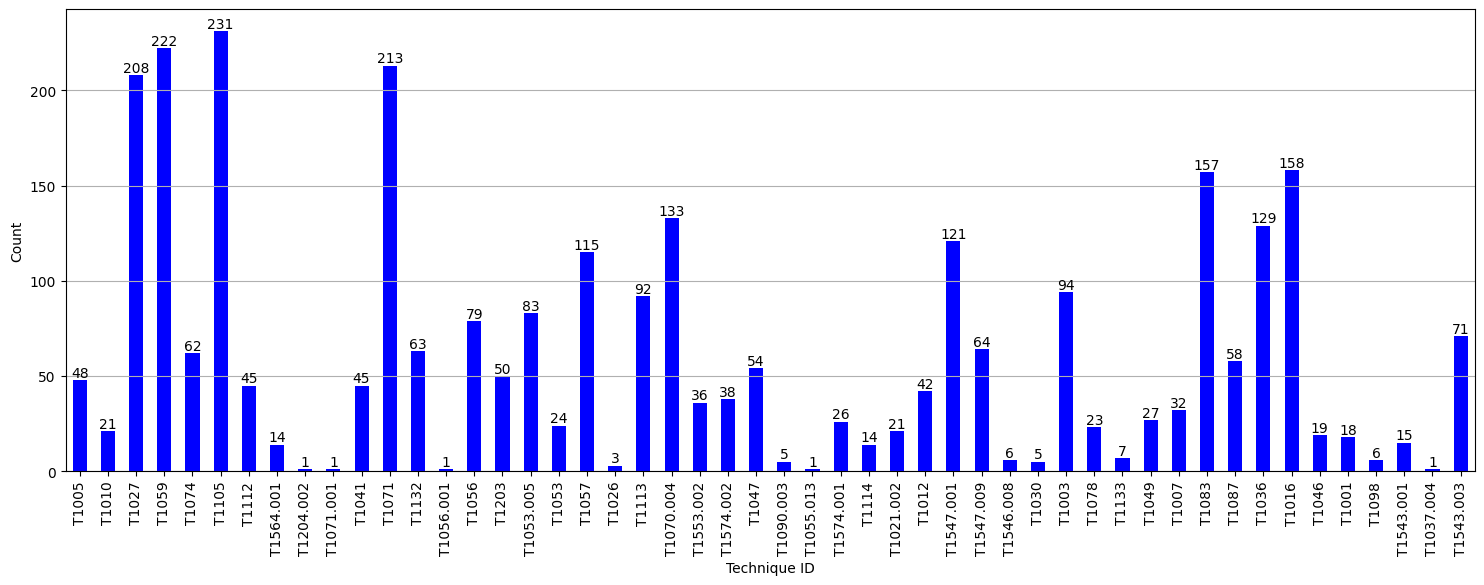

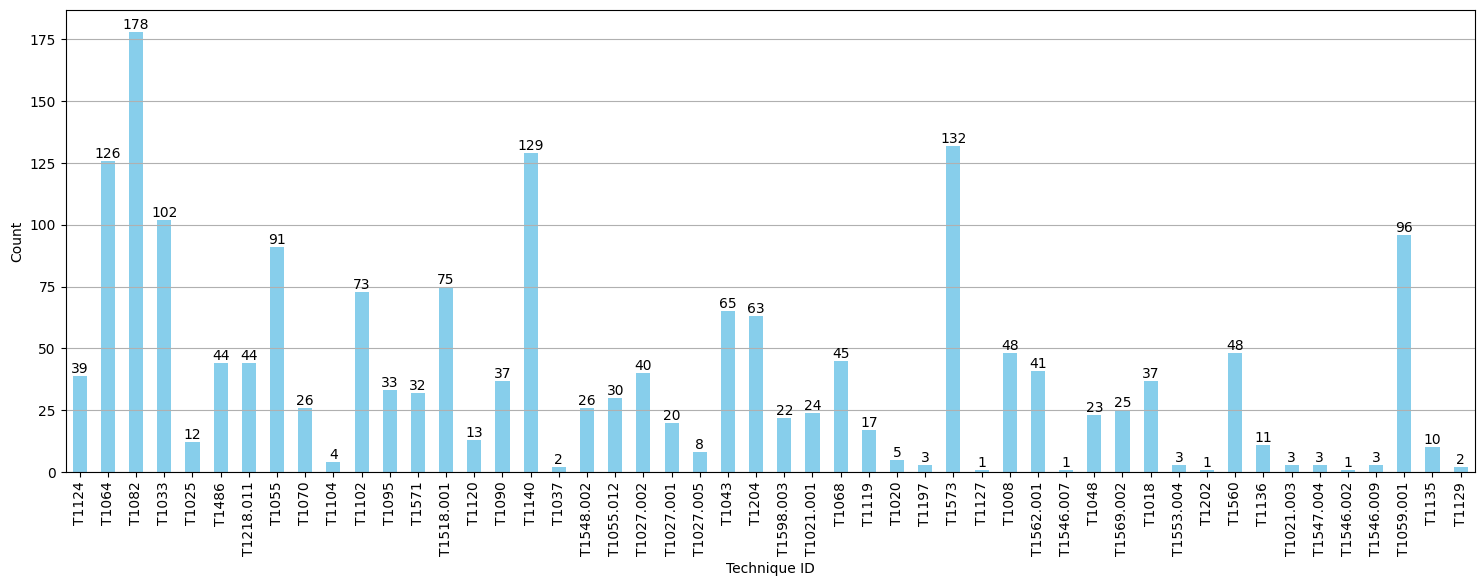

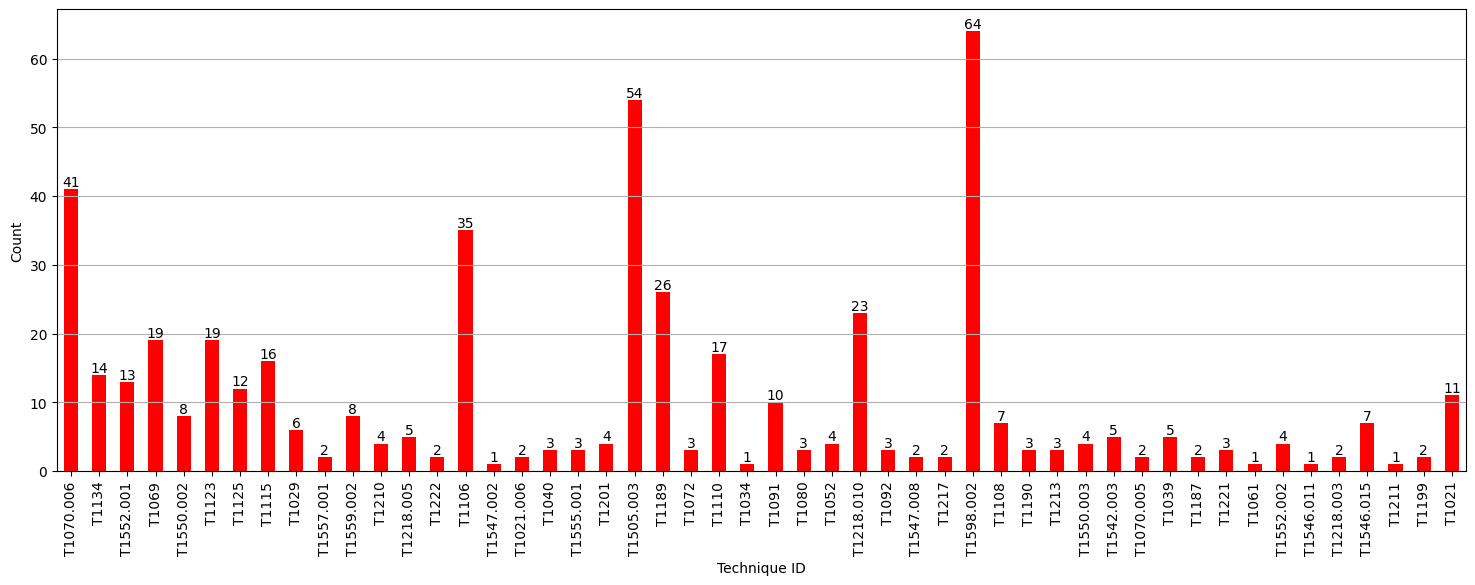

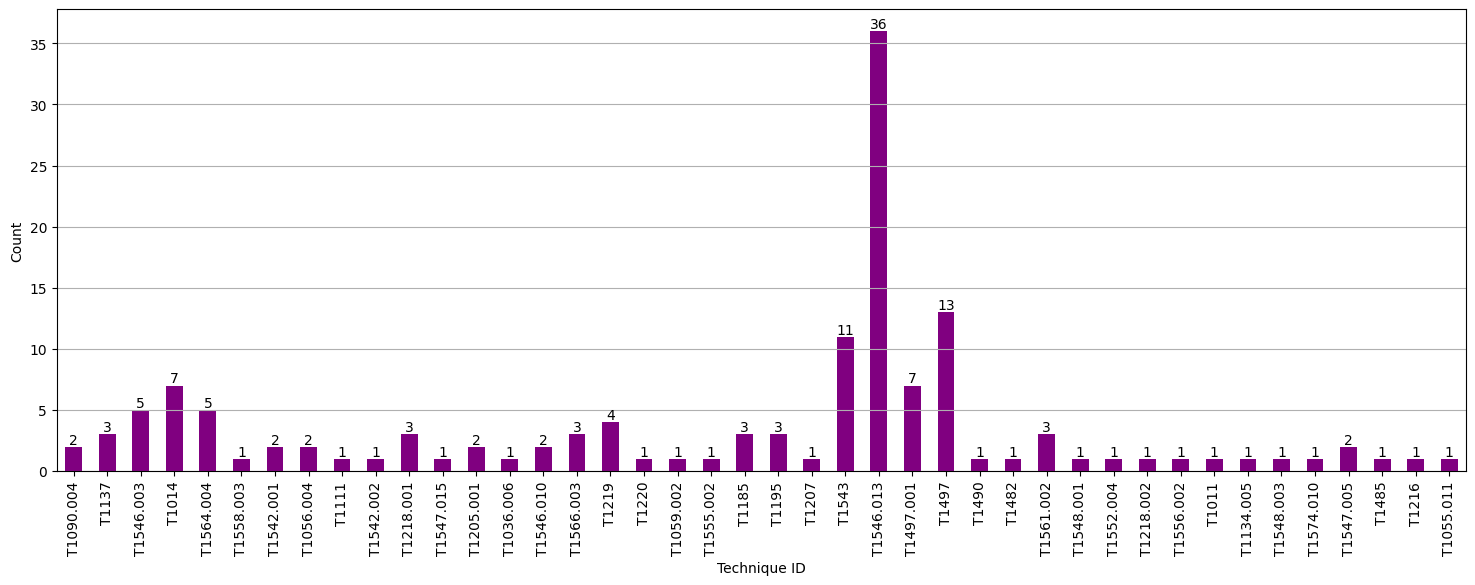

In [16]:
original_sums=provided_data.sum(numeric_only=True)
plot_classes_sums(original_sums[:50])
plot_classes_sums(original_sums[50:100],color='skyblue')
plot_classes_sums(original_sums[100:150],color='red')
plot_classes_sums(original_sums[150:-1],color='purple')

In [17]:
additional_data=pd.read_csv('dataset.txt')

In [18]:
additional_data=additional_data.drop(columns=['tec_name','Unnamed: 0','label_tec'])
filtered_data = additional_data[additional_data.label_subtec.isin(UniqueLabels)]

In [19]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data['labels']=filtered_data["label_subtec"]
filtered_data['text']=filtered_data['sentence']
filtered_data=filtered_data.drop(columns=['label_subtec','sentence'])

In [20]:
ohe_matrix2 = np.zeros((len(filtered_data),len(UniqueLabels)))
filtered_data[UniqueLabels]=ohe_matrix2
def one_hot_encoder2(data):
    for i in  range(1,len(data)) :
        data.loc[i,data.loc[i].labels]=1
one_hot_encoder2(filtered_data)
filtered_data[UniqueLabels]=filtered_data[UniqueLabels].astype(int)


/tmp/ipykernel_53539/701152006.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[UniqueLabels]=ohe_matrix2
/tmp/ipykernel_53539/701152006.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  filtered_data[UniqueLabels]=ohe_matrix2
/tmp/ipykernel_53539/701152006.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

In [21]:
sum(filtered_data.T1005.tolist())

111

In [22]:
ds = pd.concat([provided_data, filtered_data], axis=0, ignore_index=True)


In [23]:
ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,This technique can also execute local/remote s...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,Adversaries may abuse any alias in Windows Man...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,Command-line examples:\n* Local File: wmic pro...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12508,Cobalt Group used msxsl.exe to bypass AppLocke...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## choosing classes to keep and classes to augment

In [24]:
class_counts=ds["labels"].value_counts()
classes_to_keep = class_counts[class_counts >2].index

In [25]:
filtered_ds = ds[ds['labels'].isin(classes_to_keep)]

In [26]:
filtered_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12505,This technique can also execute local/remote s...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,Adversaries may abuse any alias in Windows Man...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,Command-line examples:\n* Local File: wmic pro...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12508,Cobalt Group used msxsl.exe to bypass AppLocke...,T1220,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
unduplicated_classes = class_counts[class_counts >= 15].index

In [28]:
multilabel_unique_classes = class_counts[class_counts < 15].index

In [29]:
multilabel_unique_classes_ds=filtered_ds[filtered_ds['labels'].isin(multilabel_unique_classes)]

In [30]:
filtered_ds=filtered_ds[filtered_ds['labels'].isin(unduplicated_classes)]

In [31]:
multilabel_unique_classes_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
1,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"At installation, the MSI file drops three file...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15,"""beacon"" payload can receive C2 from one proto...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,A backdoor used by created a Tor hidden servi...,[T1090.003],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,accessed email accounts using Outlook Web Access.,[T1114],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12490,KeyBoy issues the command reg add “HKLM\SOFTWA...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12491,Bazar can use Winlogon Helper DLL to establish...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12492,Turla established persistence by adding a Shel...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12493,Tropic Trooper has created the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
multilabel_unique_classes_ds=multilabel_unique_classes_ds.reset_index(drop=True)

In [33]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  l



Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-80 Data Files
  [ ] city_database....... City

Hit Enter to continue:  averaged_perceptron_tagger


  [ ] comtrans............ ComTrans Corpus Sample
  [ ] conll2000........... CONLL 2000 Chunking Corpus
  [ ] conll2002........... CONLL 2002 Named Entity Recognition Corpus
  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] extended_omw........ Extended Open Multilingual WordNet
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian........

Hit Enter to continue:  averaged_perceptron_tagger


  [ ] kimmo............... PC-KIMMO Data Files
  [ ] knbc................ KNB Corpus (Annotated blog corpus)
  [ ] large_grammars...... Large context-free and feature-based grammars
                           for parser comparison
  [ ] lin_thesaurus....... Lin's Dependency Thesaurus
  [ ] mac_morpho.......... MAC-MORPHO: Brazilian Portuguese news text with
                           part-of-speech tags
  [ ] machado............. Machado de Assis -- Obra Completa
  [ ] masc_tagged......... MASC Tagged Corpus
  [ ] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_ne_chunker_tab ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [ ] maxent_treebank_pos_tagger_tab Treebank Part of Speech Tagger (Maximum entropy)
  [ ] moses_sample........ Moses Sample Models
  [ ] movie_reviews....... Sentiment Polarity Dataset Version 2.0
  [ ] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.

Hit Enter to continue:  u


  [ ] nps_chat............ NPS Chat
  [*] omw-1.4............. Open Multilingual Wordnet
  [ ] omw................. Open Multilingual Wordnet
  [ ] opinion_lexicon..... Opinion Lexicon
  [ ] panlex_swadesh...... PanLex Swadesh Corpora
  [ ] paradigms........... Paradigm Corpus
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task
  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] pil................. The Patient Information Leaflet (PIL) Corpus
  [ ] pl196x.............. Polish language of the XX century sixties
  [ ] porter_test......... Porter Stemmer Test Files
  [ ] ppattach............ Prepositional Phrase Attachment Corpus
  [ ] problem_reports..... Problem Report Corpus
  [ ] product_reviews_1... Product Reviews (5 Products)
  [ ] product_reviews_2... Product Reviews (9 Products)
  [ ] propbank............ Proposition Bank Corpus 1.0
 

Hit Enter to continue:  averaged_perceptron_tagger


  [ ] punkt_tab........... Punkt Tokenizer Models
  [ ] qc.................. Experimental Data for Question Classification
  [ ] reuters............. The Reuters-21578 benchmark corpus, ApteMod
                           version
  [ ] rslp................ RSLP Stemmer (Removedor de Sufixos da Lingua
                           Portuguesa)
  [ ] rte................. PASCAL RTE Challenges 1, 2, and 3
  [ ] sample_grammars..... Sample Grammars
  [ ] semcor.............. SemCor 3.0
  [ ] senseval............ SENSEVAL 2 Corpus: Sense Tagged Text
  [ ] sentence_polarity... Sentence Polarity Dataset v1.0
  [ ] sentiwordnet........ SentiWordNet
  [ ] shakespeare......... Shakespeare XML Corpus Sample
  [ ] sinica_treebank..... Sinica Treebank Corpus Sample
  [ ] smultron............ SMULTRON Corpus Sample
  [ ] snowball_data....... Snowball Data
  [ ] spanish_grammars.... Grammars for Spanish
  [ ] state_union......... C-Span State of the Union Address Corpus
  [ ] stopwords........... Stopword

Hit Enter to continue:  


  [ ] switchboard......... Switchboard Corpus Sample
  [ ] tagsets............. Help on Tagsets
  [ ] tagsets_json........ Help on Tagsets (JSON)
  [ ] timit............... TIMIT Corpus Sample
  [ ] toolbox............. Toolbox Sample Files
  [ ] treebank............ Penn Treebank Sample
  [ ] twitter_samples..... Twitter Samples
  [ ] udhr2............... Universal Declaration of Human Rights Corpus
                           (Unicode Version)
  [ ] udhr................ Universal Declaration of Human Rights Corpus
  [ ] unicode_samples..... Unicode Samples
  [ ] universal_tagset.... Mappings to the Universal Part-of-Speech Tagset
  [ ] universal_treebanks_v20 Universal Treebanks Version 2.0
  [ ] vader_lexicon....... VADER Sentiment Lexicon
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] verbnet............. VerbNet Lexicon, Version 2.1
  [ ] webtext............. Web Text Corpus
  [ ] wmt15_eval.......... Evaluation data from WMT15
  [ ] word2vec_sample..... Word2Vec Sam

Hit Enter to continue:  


  [ ] wordnet31........... Wordnet 3.1
  [*] wordnet............. WordNet
  [ ] wordnet_ic.......... WordNet-InfoContent
  [ ] words............... Word Lists
  [ ] ycoe................ York-Toronto-Helsinki Parsed Corpus of Old
                           English Prose

Collections:
  [P] all-corpora......... All the corpora
  [P] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [P] all................. All packages
  [P] book................ Everything used in the NLTK Book
  [P] popular............. Popular packages
  [P] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages; [P] marks partially installed collections)

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  all-nltk


Command 'all-nltk' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  all-nltk


       | 
       | Downloading package abc to /home/hxh/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /home/hxh/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /home/hxh/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_eng to
       |     /home/hxh/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /home/hxh/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /home/hxh/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /home/hxh/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downl

In [35]:
import nlpaug.augmenter.word as naw
import pandas as pd

# Initialize augmenters
aug_contextual = naw.ContextualWordEmbsAug(model_path='distilbert-base-uncased', action='substitute')
aug_synonym = naw.SynonymAug(aug_p=0.2, aug_min=1)

# Dictionary to store augmented data
augmented_dict = {"text": [], "labels": []}
num_augmentations = 2

# Function for synonym-based augmentation
def augment_text(text):
    return aug_synonym.augment(text)

# Perform augmentation
for i in range(multilabel_unique_classes_ds.shape[0]):
    for num in range(num_augmentations):
        # Contextual word embeddings augmentation
        augmented_text_contextual = aug_contextual.augment(multilabel_unique_classes_ds.text[i])
        augmented_dict["text"].append(augmented_text_contextual)
        augmented_dict['labels'].append(multilabel_unique_classes_ds.loc[i, "labels"])
        
        # Synonym-based augmentation
        augmented_text_synonym = augment_text(multilabel_unique_classes_ds.text[i])
        augmented_dict["text"].append(augmented_text_synonym)
        augmented_dict['labels'].append(multilabel_unique_classes_ds.loc[i, "labels"])

# Create a new DataFrame from augmented data
new_df = pd.DataFrame(augmented_dict)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hxh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/home/hxh/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [136]:
new_df.loc[3,'text']

['At installation, the MSI file drops three file cabinet and creates 1 hidden directory (UFile) into 100: \\ ProgramData \\ Apple \\ Update \\, likely as a ruse']

In [56]:
multilabel_unique_classes_ds.loc[1,'text']

'At installation, the MSI file drops three files and creates one hidden directory (UFile) into C:\\ProgramData\\Apple\\Update\\, likely as a ruse'

In [57]:
ohe_matrix_low = np.zeros((len(new_df),len(cleaned_list)))
new_df[cleaned_list]=ohe_matrix_low




C:\Users\user\AppData\Local\Temp\ipykernel_19756\2502806842.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[cleaned_list]=ohe_matrix_low
C:\Users\user\AppData\Local\Temp\ipykernel_19756\2502806842.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[cleaned_list]=ohe_matrix_low
C:\Users\user\AppData\Local\Temp\ipykernel_19756\2502806842.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [58]:
for i in range(new_df.shape[0]):
    labels=new_df.loc[i,"labels"]
    new_df.loc[i,labels]=1

    
        

In [74]:

new_df[cleaned_list]=new_df[cleaned_list].astype(int)



In [75]:
new_df

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,[captures window title.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[captures window titles.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[At installation, the MSI file drop curtain th...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[At installation, the MSI file drops three fil...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"["" radio beacon "" payload can receive C2 from ...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,[Turla established persistence by adding a Rac...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2380,[Tropic Trooper has produce the Registry funda...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2381,[Tropic Trooper has create the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2382,[Whizz Spider has established persistence usin...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
for i in range(new_df.shape[0]):
    if len(filtered_data.loc[i,'text'])==1:
        filtered_data.loc[i,'text']=filtered_data.loc[i,"text"][0]

# model training

In [77]:
X=filtered_ds["text"]
y=filtered_ds[cleaned_list]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # proportion of the data to include in the test split
    stratify=y,     # ensure that the split maintains the proportion of each class
    random_state=42 # for reproducibility
)

In [78]:
new_df

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,[captures window title.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[captures window titles.],[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[At installation, the MSI file drop curtain th...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[At installation, the MSI file drops three fil...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"["" radio beacon "" payload can receive C2 from ...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,[Turla established persistence by adding a Rac...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2380,[Tropic Trooper has produce the Registry funda...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2381,[Tropic Trooper has create the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2382,[Whizz Spider has established persistence usin...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_test=pd.concat([X_test,multilabel_unique_classes_ds.text],ignore_index=True)
y_test=pd.concat([y_test,multilabel_unique_classes_ds[cleaned_list]],ignore_index=True)
X_train=pd.concat([X_train,new_df.text],ignore_index=True)
y_train=pd.concat([y_train,new_df[cleaned_list]],ignore_index=True)

In [84]:
X_train

0        4H RAT has the capability to obtain file and d...
1         can download or upload files from its C2 server.
2        FIN4 has used Tor to log in to victims' email ...
3        POWRUNER may collect information on the victim...
4        collects the victim’s username and whether tha...
                               ...                        
11111    [Turla established persistence by adding a Rac...
11112    [Tropic Trooper has produce the Registry funda...
11113    [Tropic Trooper has create the Registry key HK...
11114    [Whizz Spider has established persistence usin...
11115    [Wizard Wanderer has established persistence u...
Name: text, Length: 11116, dtype: object

In [85]:
multilabel_unique_classes_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,captures window titles.,[T1010],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"At installation, the MSI file drops three file...",[T1564.001],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"""beacon"" payload can receive C2 from one proto...",[T1026],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A backdoor used by created a Tor hidden servi...,[T1090.003],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,accessed email accounts using Outlook Web Access.,[T1114],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,KeyBoy issues the command reg add “HKLM\SOFTWA...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1188,Bazar can use Winlogon Helper DLL to establish...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1189,Turla established persistence by adding a Shel...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,Tropic Trooper has created the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
y_test

,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,T1204.002,T1071.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y_train

,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,T1204.002,T1071.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
y_test

,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,T1204.002,T1071.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
for i in range(len(X_train)):
    if len(X_train.loc[i])==1:
        X_train.loc[i]=X_train.loc[i][0]

In [106]:
y2=y_train.to_numpy()
y3=y_test.to_numpy()

In [120]:
# model loading 
path="results/checkpoint-25000"
from transformers import AutoConfig, AutoModelForSequenceClassification , RobertaTokenizer



config = AutoConfig.from_pretrained(path)

model = AutoModelForSequenceClassification.from_pretrained(path, config=config)
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [108]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the RoBERTa tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Load the RoBERTa model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', 
    num_labels=y2.shape[1], 
    problem_type="multi_label_classification"
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [110]:
train_encodings = tokenizer(X_train.to_list(),return_tensors='pt',padding=True,truncation=True)
test_encodings = tokenizer(X_test.to_list(),return_tensors='pt',padding=True,truncation=True)

In [116]:
import torch

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encodings, y2)
test_dataset = TextDataset(test_encodings, y3)

In [118]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    output_dir='./results',
    num_train_epochs=11,
    logging_dir='./logs',
    evaluation_strategy="epoch", 
    
    
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


trainer.train()


C:\ProgramData\anaconda3\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.019500,0.017768
2,0.010300,0.010291
3,0.006400,0.007190
4,0.003500,0.005447
5,0.001800,0.005360
6,0.001200,0.005253
7,0.000700,0.005393
8,0.000400,0.005324
9,0.000200,0.005238
10,0.000100,0.005417


C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\user\AppData\Local\Temp\ipykernel_19756\656612214.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.en

TrainOutput(global_step=30569, training_loss=0.005626074408290904, metrics={'train_runtime': 6771.2816, 'train_samples_per_second': 18.058, 'train_steps_per_second': 4.515, 'total_flos': 1.6252756071788544e+16, 'train_loss': 0.005626074408290904, 'epoch': 11.0})

In [122]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [124]:
train_eval = list(X_train)
test_eval=te = list(X_test)
train_inputs = tokenizer(train_eval, padding=True, truncation=True, return_tensors="pt")
test_inputs= tokenizer(test_eval, padding=True, truncation=True, return_tensors="pt")
train_inputs = {key: value.to(device) for key, value in train_inputs.items()}
test_inputs = {key: value.to(device) for key, value in test_inputs.items()}


In [126]:
import torch


threshold = 0.5  
model.eval()
model.to(device)
batch_size = 16  
num_batches = len(train_inputs['input_ids']) // batch_size + 1

train_predictions = []


with torch.no_grad():
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(train_inputs['input_ids']))
        
        # Extract batch inputs and move to device
        batch_input_ids = train_inputs['input_ids'][start_idx:end_idx].to(device)
        batch_attention_mask = train_inputs['attention_mask'][start_idx:end_idx].to(device)
        
        # Perform inference
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        
        # Convert logits to NumPy array and apply threshold
        logits_np = logits.cpu().numpy()
        batch_predictions = (logits_np > threshold).astype(int)
        
        # Store batch predictions
        train_predictions.append(batch_predictions)

train_predictions = np.concatenate(train_predictions, axis=0)

print("Predictions shape:", train_predictions.shape)


Predictions shape: (11116, 193)


In [128]:
from sklearn.metrics import f1_score
f1 = f1_score(y2, train_predictions, average='micro')  
print(f'F1 Score on train set: {f1}')

F1 Score on train set: 0.9992585161599861


In [130]:
test_predictions = []
batch_size = 16  
num_batches = len(test_inputs['input_ids']) // batch_size + 1

with torch.no_grad():
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = min(start_idx + batch_size, len(test_inputs['input_ids']))
        
        # Extract batch inputs and move to device
        batch_input_ids = test_inputs['input_ids'][start_idx:end_idx].to(device)
        batch_attention_mask = test_inputs['attention_mask'][start_idx:end_idx].to(device)
        
        # Perform inference
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
        logits = outputs.logits
        
        # Convert logits to NumPy array and apply threshold
        logits_np = logits.cpu().numpy()
        batch_predictions = (logits_np > threshold).astype(int)
        
        # Store batch predictions
        test_predictions.append(batch_predictions)

test_predictions = np.concatenate(test_predictions, axis=0)

print("Predictions shape:", test_predictions.shape)

Predictions shape: (3375, 193)


In [132]:
f1 = f1_score(y3, test_predictions, average='micro')  
print(f'F1 Score: {f1}')

F1 Score: 0.897215337512757


In [134]:
def view_true_vs_predicted_labels(X, y, predictions, i, cleaned_list=cleaned_list):
    pred_labels = [cleaned_list[j] for j in range(predictions[i].shape[0]) if predictions[i, j] == 1]
    true_labels = [cleaned_list[j] for j in range(y[i].shape[0]) if y[i, j] == 1]
    print(f'Instance: {X[i]}')
    print(f'Predicted Labels: {pred_labels}')
    print(f'True Labels: {true_labels}')
    


In [136]:
view_true_vs_predicted_labels(X_test,y3,test_predictions,1529)

Instance: GoldMax has decoded and decrypted the configuration file when executed.
Predicted Labels: ['T1140']
True Labels: ['T1140']


In [138]:
ds[ds.text==X_test[1529]]

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
6033,GoldMax has decoded and decrypted the configur...,T1140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data visualization

In [148]:
whole_ds=pd.concat([filtered_ds,new_df],axis=0 ,ignore_index=True)

In [150]:
whole_ds

,text,labels,T1005,T1010,T1027,T1059,T1074,T1105,T1112,T1564.001,...,T1556.002,T1011,T1134.005,T1548.003,T1574.010,T1547.005,T1485,T1216,T1055.011,T1569.001
0,creates a backdoor through which remote attack...,[T1005],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hides any strings related to its own indicator...,[T1027],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,creates a backdoor through which remote attack...,[T1059],0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,stages collected data in a text file.,[T1074],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,can download and execute a second-stage payload.,[T1105],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,[Turla established persistence by adding a Rac...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13295,[Tropic Trooper has produce the Registry funda...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13296,[Tropic Trooper has create the Registry key HK...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13297,[Whizz Spider has established persistence usin...,T1547.004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
col_sum=whole_ds.sum(numeric_only=True)

In [154]:
col_sum[:30]

T1005        151
T1010         55
T1027        524
T1059        264
T1074         59
T1105        543
T1112        150
T1564.001     70
T1204.002    121
T1071.001    262
T1041        111
T1071        215
T1132         67
T1056.001    123
T1056         88
T1203        114
T1053.005    191
T1053         41
T1057        316
T1026          6
T1113        205
T1070.004    322
T1553.002     90
T1574.002     87
T1047        133
T1090.003     38
T1055.013     20
T1574.001     58
T1114         38
T1021.002     62
dtype: int64

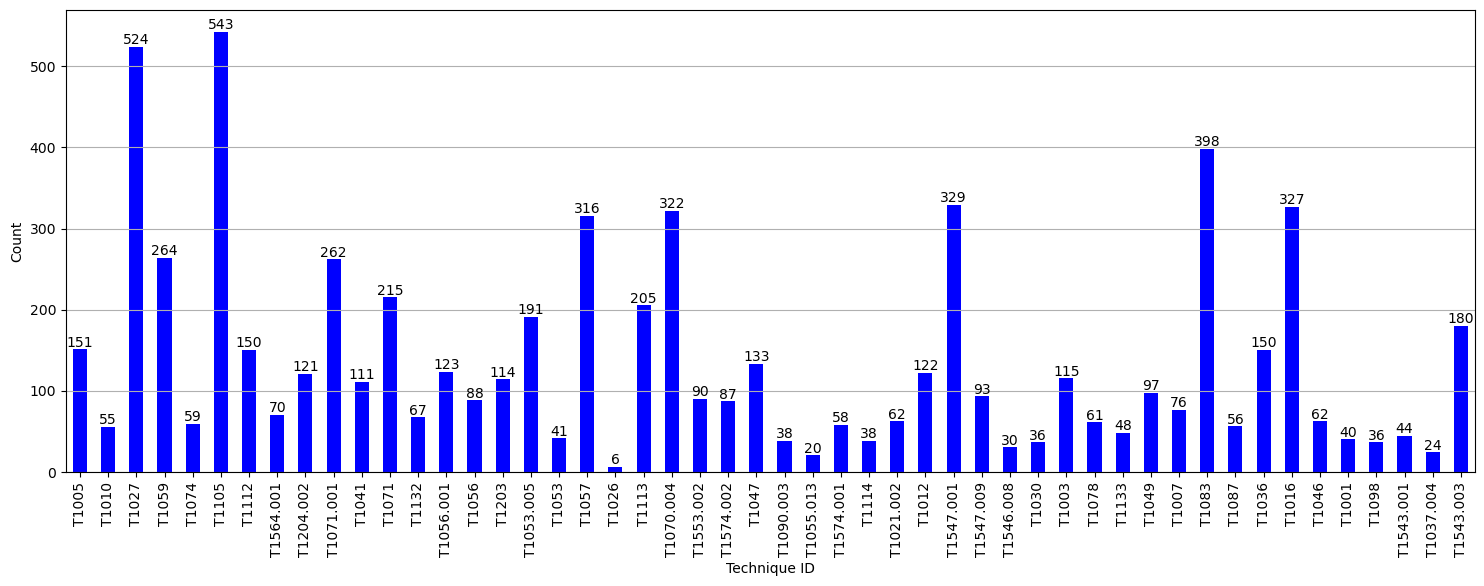

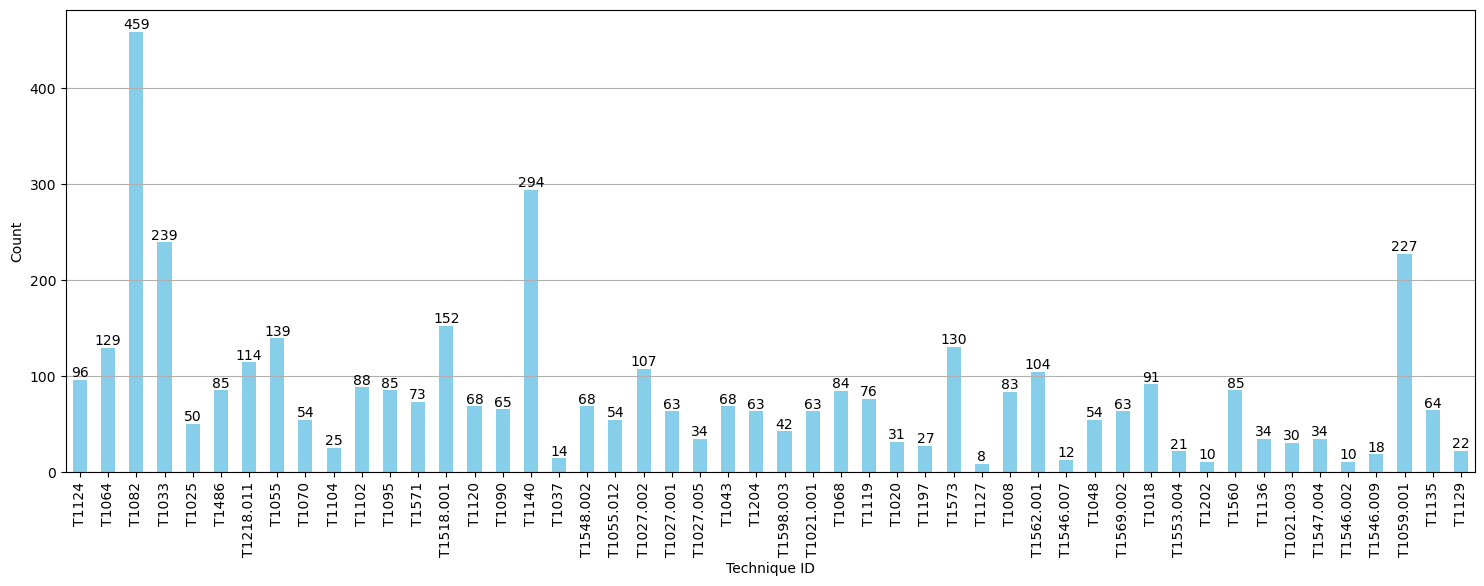

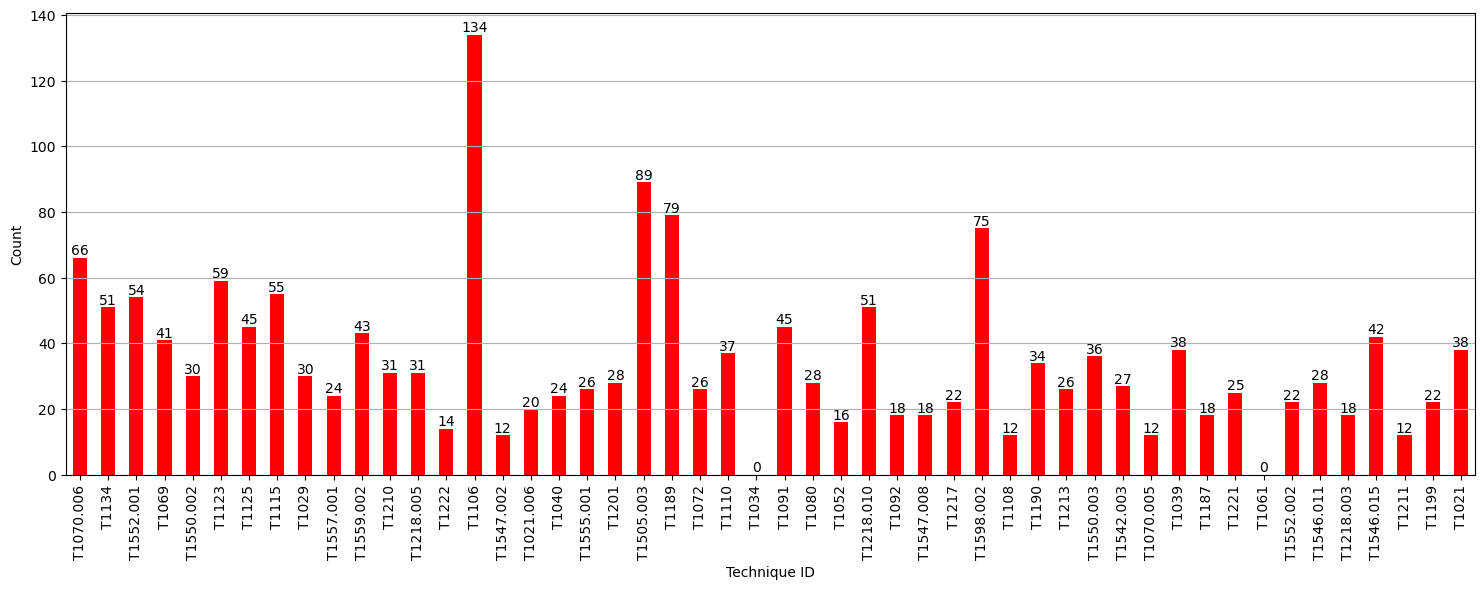

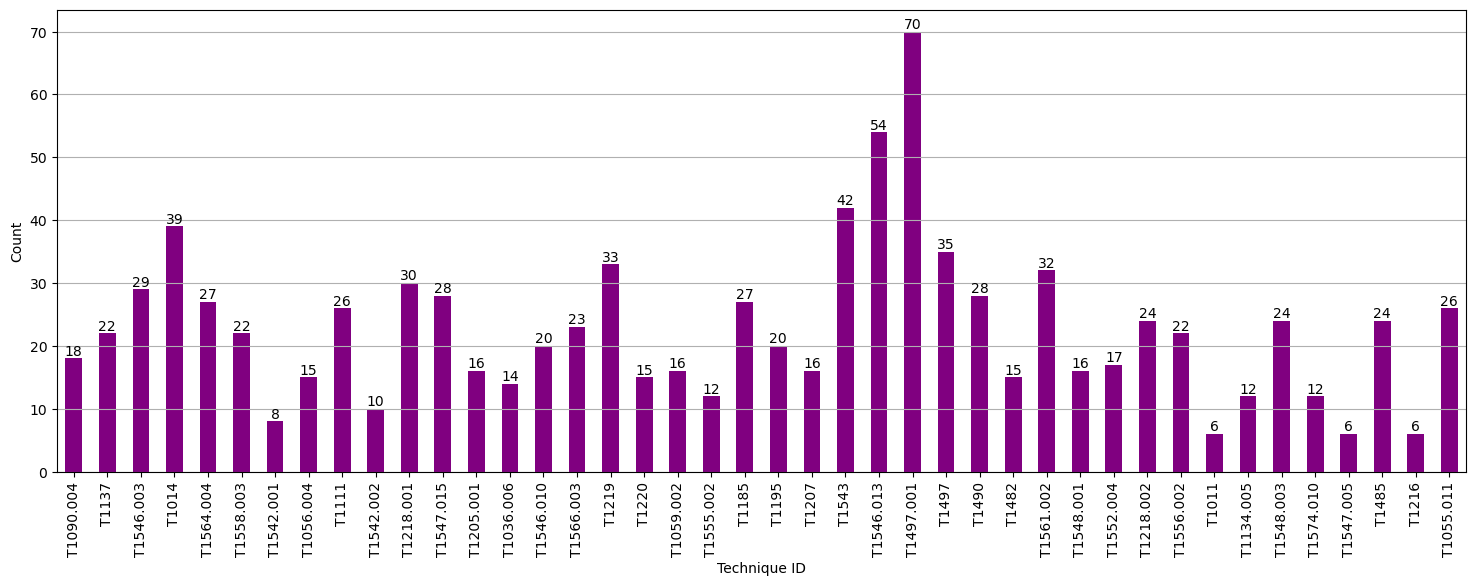

In [158]:
plot_classes_sums(col_sum[:50])
plot_classes_sums(col_sum[50:100],color='skyblue')
plot_classes_sums(col_sum[100:150],color='red')
plot_classes_sums(col_sum[150:-1],color='purple')

In [166]:
bert_stats={"train_loss":[0.0254,0.0158,0.0111,0.0087,0.0064,0.005,0.0047,0.0034],"val_loss":[0.027,0.0164,0.0119,0.0103,0.0094,0.0088,0.0085,0.0082],
           "f_1":[0.94,0.79]}
roberta_stats={"train_loss":[0.0311,0.0314,0.0309],"val_loss":[0.0298,0.0298,0.0297]}
dbert_old={"train_loss":[0.0186,0.01170,0.007,0.0046,0.0034,0.0023],"val_loss":[0.0156,0.0102,0.0084,0.007590,0.0071,0.0070],
"f_1":[0,96,0.82]}
dbert_new={"train_loss":[0.0195,0.0103,0.0064,0.0035,0.0018,0.0012,0.0007,0.0004,0.0002,0.0001,0.0001],
           "val_loss":[0.0177,0.0102,0.0071,0.0054,0.0053,0.0052,0.0053,0.0053,0.0052,0.0054,0.0055]}

Text(0.5, 0, 'Epochs')

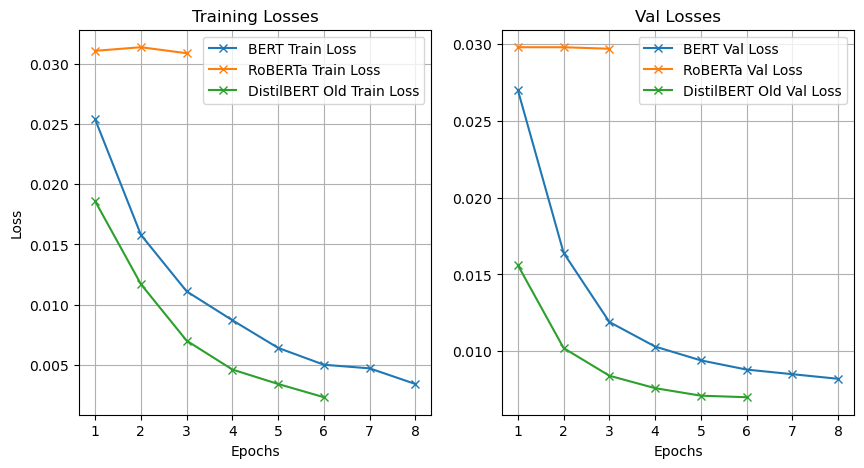

In [168]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Losses
epochs_bert = range(1, len(bert_stats["train_loss"]) + 1)
epochs_roberta = range(1, len(roberta_stats["train_loss"]) + 1)
epochs_dbert_old = range(1, len(dbert_old["train_loss"]) + 1)

ax[0].plot(epochs_bert, bert_stats["train_loss"], label='BERT Train Loss', marker='x')
ax[1].plot(epochs_bert, bert_stats["val_loss"], label='BERT Val Loss', marker='x')
ax[0].plot(epochs_roberta, roberta_stats["train_loss"], label='RoBERTa Train Loss', marker='x')
ax[1].plot(epochs_roberta, roberta_stats["val_loss"], label='RoBERTa Val Loss', marker='x')
ax[0].plot(epochs_dbert_old, dbert_old["train_loss"], label='DistilBERT Old Train Loss', marker='x')
ax[1].plot(epochs_dbert_old, dbert_old["val_loss"], label='DistilBERT Old Val Loss', marker='x')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Losses')
ax[0].legend()
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_title('Val Losses')
ax[1].legend()
ax[1].set_xlabel('Epochs')



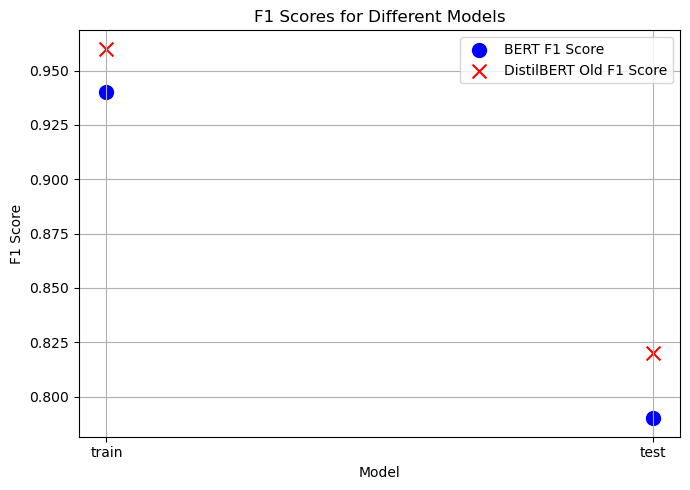

In [170]:
import matplotlib.pyplot as plt

# Data
models = ['train', 'test']
bert_f1 = [0.94, 0.79]
dbert_old_f1 = [0.96, 0.82]

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))


ax.scatter(models, bert_f1, color='blue', label='BERT F1 Score', s=100, marker='o')
ax.scatter(models, dbert_old_f1, color='red', label='DistilBERT Old F1 Score', s=100, marker='x')
# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Different Models')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Epochs')

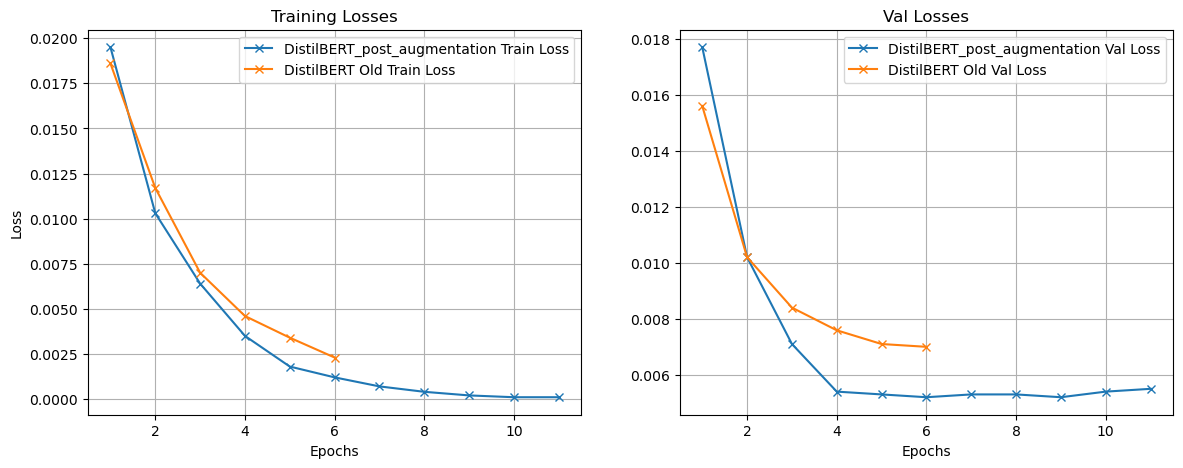

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))


epochs_dbert_new = range(1, len(dbert_new["train_loss"]) + 1)
epochs_dbert_old = range(1, len(dbert_old["train_loss"]) + 1)

ax[0].plot(epochs_dbert_new, dbert_new["train_loss"], label='DistilBERT_post_augmentation Train Loss', marker='x')
ax[1].plot(epochs_dbert_new, dbert_new["val_loss"], label='DistilBERT_post_augmentation Val Loss', marker='x')
ax[0].plot(epochs_dbert_old, dbert_old["train_loss"], label='DistilBERT Old Train Loss', marker='x')
ax[1].plot(epochs_dbert_old, dbert_old["val_loss"], label='DistilBERT Old Val Loss', marker='x')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Losses')
ax[0].legend()
ax[0].grid(True)
ax[1].grid(True)
ax[1].set_title('Val Losses')
ax[1].legend()
ax[1].set_xlabel('Epochs')


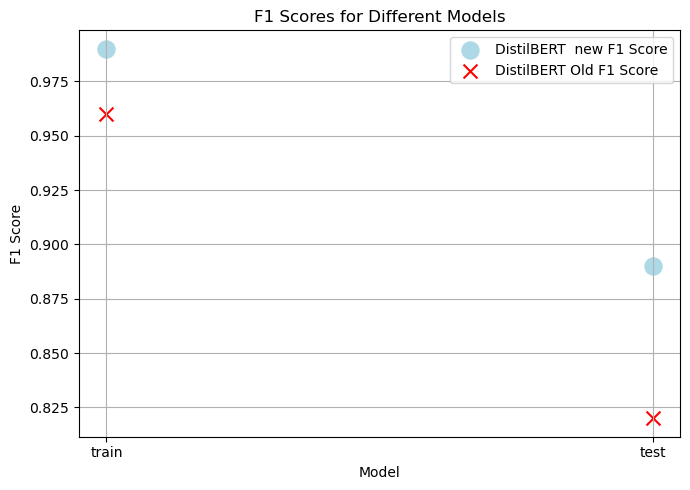

In [176]:
# Data
models = ['train', 'test']
dbert_new_f1 = [0.99, 0.89]
dbert_old_f1 = [0.96, 0.82]

# Plotting
fig, ax = plt.subplots(figsize=(7, 5))


ax.scatter(models, dbert_new_f1, color='lightblue', label='DistilBERT  new F1 Score', s=150, marker='o')
ax.scatter(models, dbert_old_f1, color='red', label='DistilBERT Old F1 Score', s=100, marker='x')
# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Different Models')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()